# Risco Relativo

In [ ]:
!pip install scipy pandas numpy


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
!pip install --upgrade google-cloud-bigquery


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import bigquery
import pandas as pd

In [ ]:
client = bigquery.Client(project='laboratoria-projeto3')

In [ ]:
table_id = "laboratoria-projeto3.dados_projeto3.Tabela_final"
df = client.list_rows(table_id).to_dataframe()

In [ ]:
df.head()

,user_id,age,last_month_salary,number_dependents,default_flag,qtd_real_estate,qtd_other,total_loan,using_lines_not_secured_personal_assets,number_times_delayed_payment_loan_30_59_days,debt_ratio,quartil_idade,quartil_salario,quartil_dependentes,quartil_atraso_30_59,dummy_idade_risco,dummy_salario_risco,dummy_dependentes_risco,dummy_atraso_risco,score_risco
0,14472,66,2146,0,0,0,2,2,9.999.999,0,306.939.916,4,2,1,1,0,0,0,0,0
1,12408,76,15000,0,0,0,3,3,9.999.999,0,44.197.054,4,4,1,1,0,0,0,0,0
2,22248,69,3300,0,0,0,4,4,232.038.104,0,277.491.669,4,2,1,2,0,0,0,0,0
3,14782,59,4200,0,0,0,4,4,54.527.571,0,33.325.399,3,2,1,1,0,0,0,0,0
4,11098,59,12500,0,0,0,4,4,30.464.636,0,1.039.917,3,4,1,1,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35575 entries, 0 to 35574
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   user_id                                       35575 non-null  object
 1   age                                           35575 non-null  object
 2   last_month_salary                             35575 non-null  object
 3   number_dependents                             35575 non-null  object
 4   default_flag                                  35575 non-null  Int64 
 5   qtd_real_estate                               35575 non-null  Int64 
 6   qtd_other                                     35575 non-null  Int64 
 7   total_loan                                    35575 non-null  Int64 
 8   using_lines_not_secured_personal_assets       35575 non-null  object
 9   number_times_delayed_payment_loan_30_59_days  35575 non-null  Int64 
 10

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss

In [ ]:
X = df[['number_times_delayed_payment_loan_30_59_days',
        'number_dependents',
        'last_month_salary',
        'age']].copy()

X['last_month_salary'] = X['last_month_salary'].astype(float)
X['age'] = X['age'].astype(int)
X['number_dependents'] = X['number_dependents'].astype(int)

In [ ]:
y = df['default_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_prob > 0.23).astype(int)

In [ ]:
print("Acurácia:", accuracy_score(y_test, y_pred_custom))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_custom))
print("Precisão:", precision_score(y_test, y_pred_custom))
print("Revocação:", recall_score(y_test, y_pred_custom))
print("F1-Score:", f1_score(y_test, y_pred_custom))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))
print("Log-Loss:", log_loss(y_test, y_prob))

Acurácia: 0.9801367937786939
Matriz de Confusão:
 [[10406    80]
 [  132    55]]
Precisão: 0.4074074074074074
Revocação: 0.29411764705882354
F1-Score: 0.3416149068322981
AUC-ROC: 0.9179667618959224
Log-Loss: 0.06246260100034935


# Gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


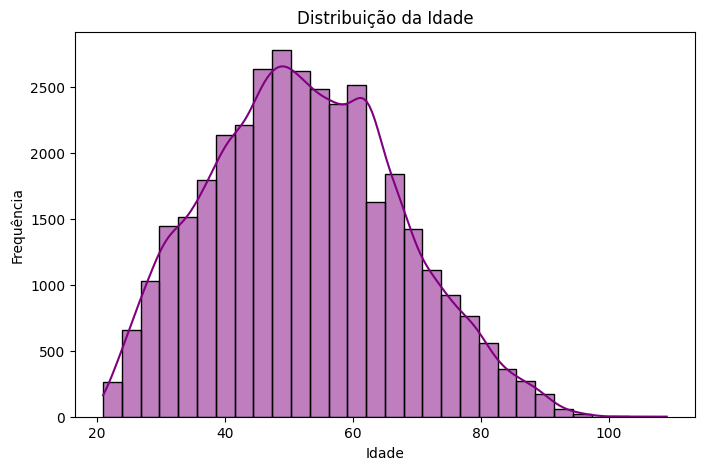

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'].astype(float), bins=30, kde=True, color='purple')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

/tmp/ipython-input-22-504857424.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='number_dependents', y='default_flag', data=df, ci=None, color='purple')


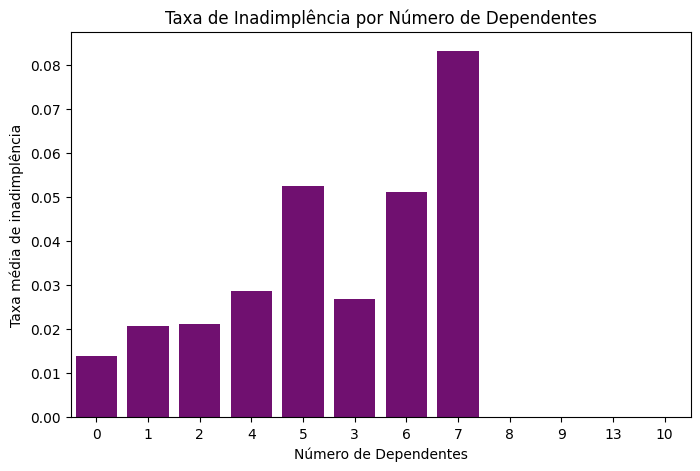

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='number_dependents', y='default_flag', data=df, ci=None, color='purple')
plt.title('Taxa de Inadimplência por Número de Dependentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Taxa média de inadimplência')
plt.show()

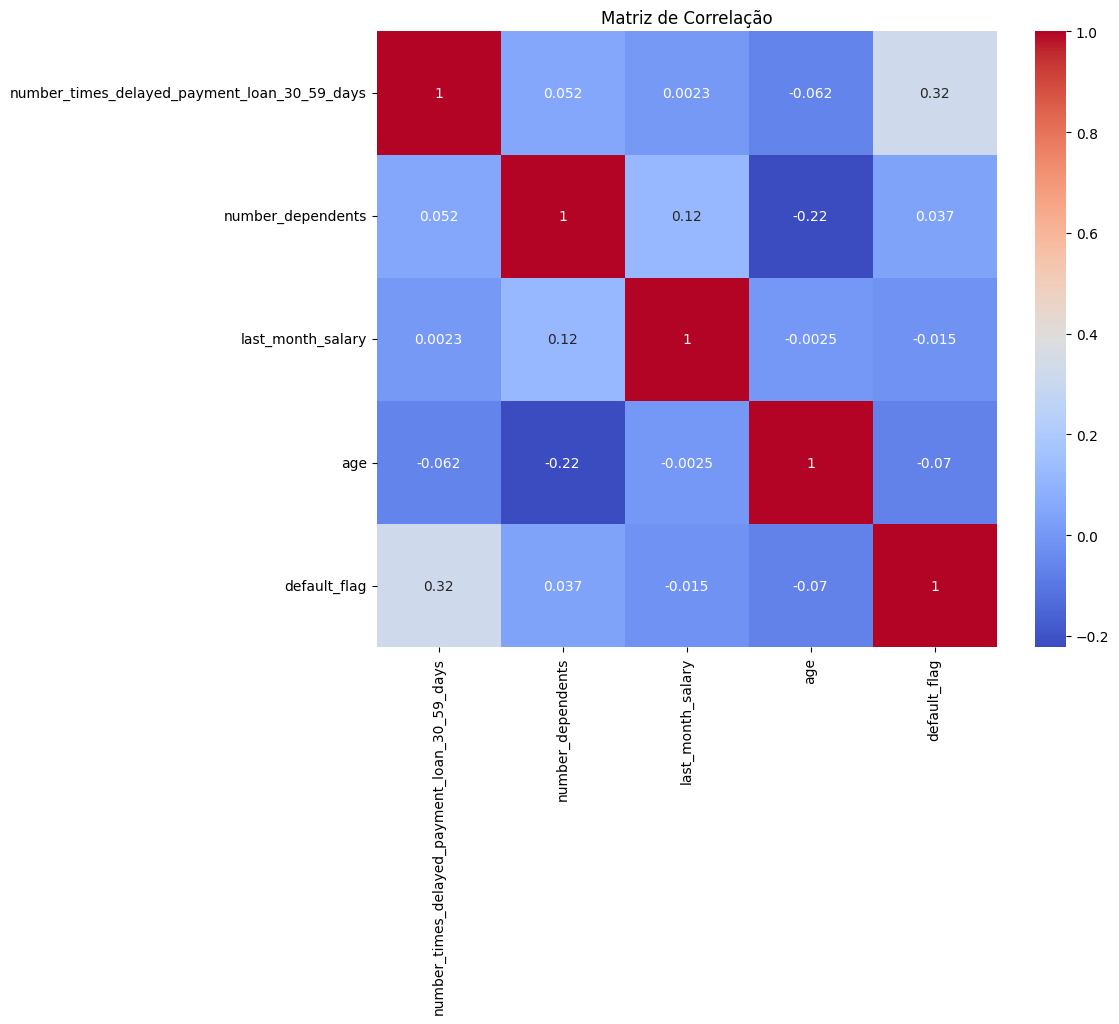

In [ ]:
plt.figure(figsize=(10,8))
corr = df[['number_times_delayed_payment_loan_30_59_days', 'number_dependents', 'last_month_salary', 'age', 'default_flag']].astype(float).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

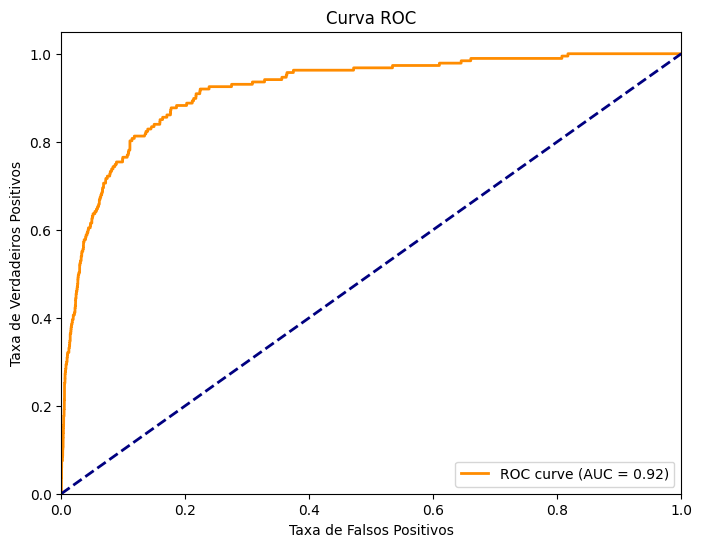

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# y_test e y_prob (probabilidades previstas) já definidos no seu código
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


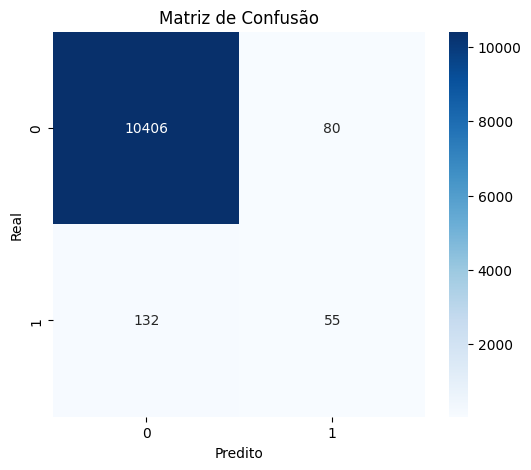

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_custom)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()